In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
from tqdm import tqdm
from os import makedirs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import datetime



In [5]:
!ls

Crawler.ipynb  k-means.ipynb


In [6]:
x=np.empty((0,(310*480)))

paths=glob.glob("../dataset/*.jpg")
list_file_name = []
for path in tqdm(paths):
    img=Image.open(path)
    img = img.convert('L')
    img=img.resize((310, 480))
    x=np.append(x,np.array(img).reshape(1,-1),axis=0)
    list_file_name.append(path.split("/")[-1])

100%|██████████| 1824/1824 [05:29<00:00,  5.53it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [41:34<00:00, 178.21s/it]


ValueError: x and y must have same first dimension, but have shapes (19,) and (14,)

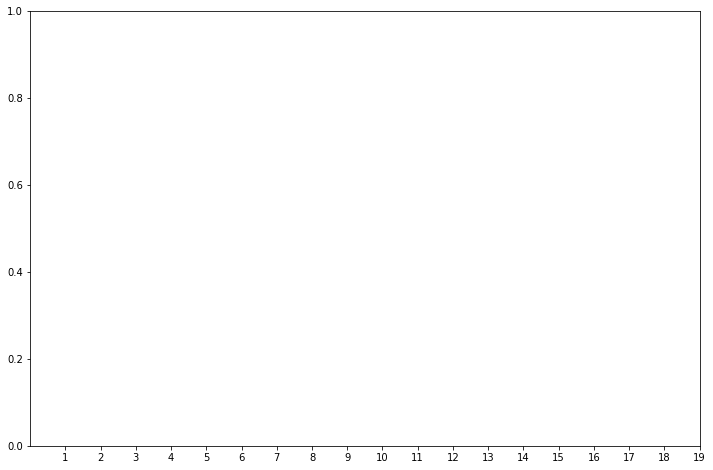

In [4]:
# distortions = [] #エルボー法（最適なクラスター数を求める）
# for k in tqdm(range(1, 15)):
#     kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
#     kmeans.fit(x)
#     distortions.append(kmeans.inertia_)


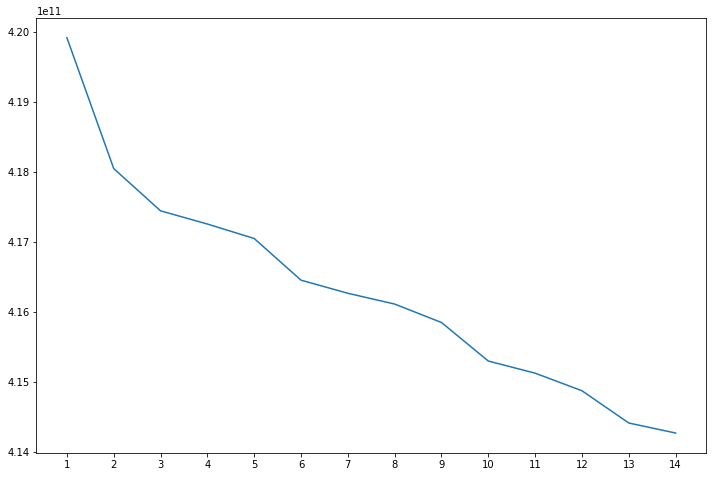

In [5]:
fig = plt.figure(figsize=(12, 8))
plt.xticks(range(1, 15))
plt.plot(range(1, 15), distortions)
plt.savefig("elbow.jpg")
plt.show()

In [7]:
k_means = KMeans(n_clusters=10).fit(x)
y_pred = k_means.predict(x)
print(k_means.labels_)
print(pd.Series(k_means.labels_, name='cluster_number').value_counts(sort=False))



[1 1 2 ... 1 7 7]
1    957
2     98
7    724
6     39
9      1
0      1
4      1
8      1
5      1
3      1
Name: cluster_number, dtype: int64


クラス4, 5, 7, 8 が何かによってクラスタリングされた模様
0, 1, 2, 3, 9は外れ値か

In [21]:
out=pd.DataFrame()
out["picture"]=paths
out["classnumber"]=y_pred
# out["date"]=out["picture"].str.split("/",expand=True).iloc[:,-1].str.replace(".jpg", "", regex=False)
tmp = out["picture"].str.split("/",expand=True).iloc[:,-1].str.replace(".jpg", "", regex=False)
tmp = tmp.apply(lambda x: datetime.datetime.strptime(x, "%Y%m%d%H"))
out["date"] = tmp
out["month"] = out["date"].apply(lambda x: x.month)
#out.to_csv("out_10.csv")

In [22]:
out.head(5)

,picture,classnumber,date,month
0,../dataset/2021042812.jpg,1,2021-04-28 12:00:00,4
1,../dataset/2019031612.jpg,1,2019-03-16 12:00:00,3
2,../dataset/2019090600.jpg,2,2019-09-06 00:00:00,9
3,../dataset/2020020412.jpg,7,2020-02-04 12:00:00,2
4,../dataset/2019032800.jpg,7,2019-03-28 00:00:00,3


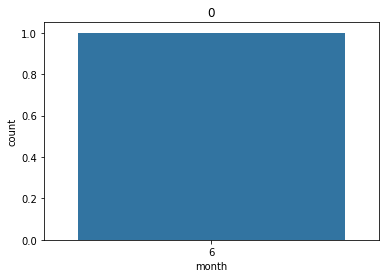

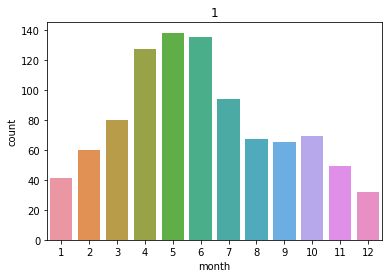

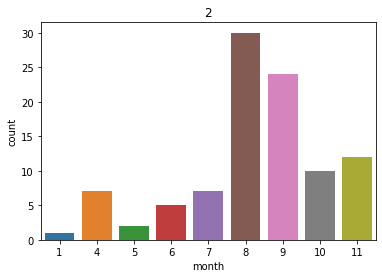

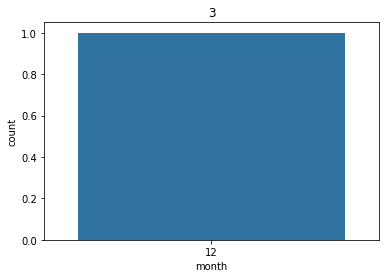

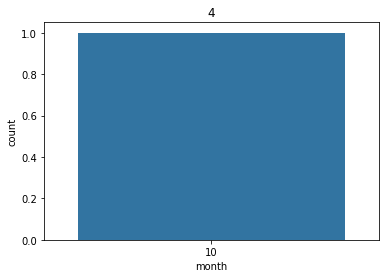

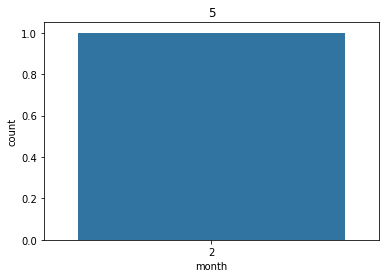

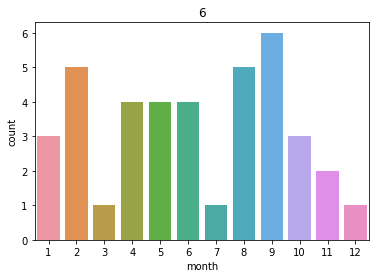

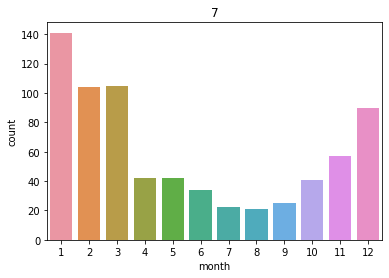

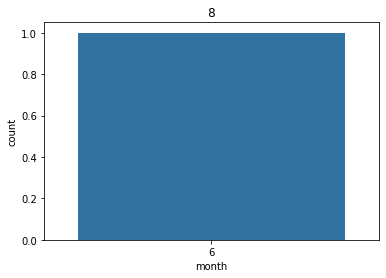

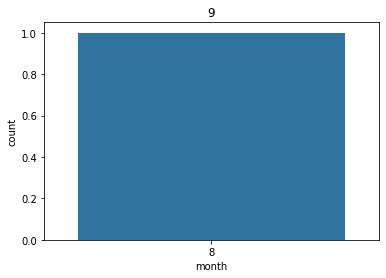

In [25]:
for i in range(10):
    sns.countplot(x="month",data=out[out["classnumber"]==i])
    plt.title(i)
    #plt.savefig("月分布"+str(i))
    plt.show()

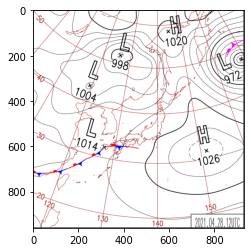

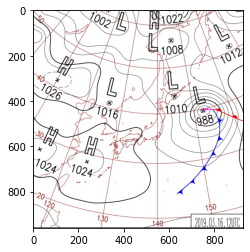

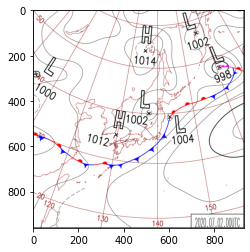

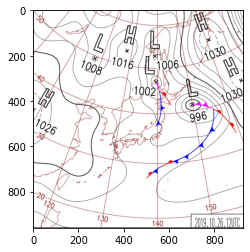

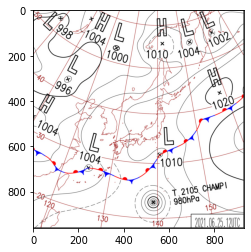

In [30]:
test_data=out[out["classnumber"]==1]
for path in test_data["picture"][:5]:
    fig = plt.figure()
    plt.imshow(Image.open(path))

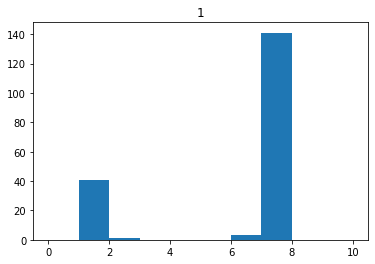

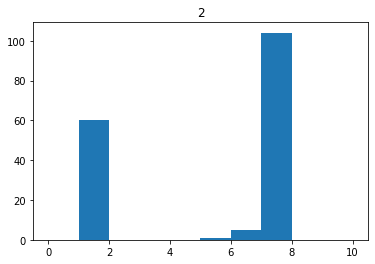

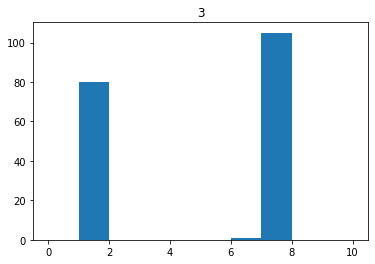

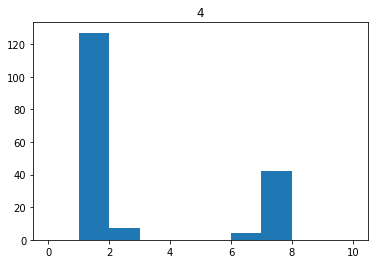

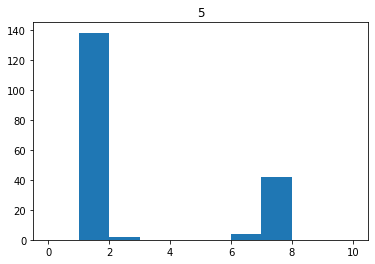

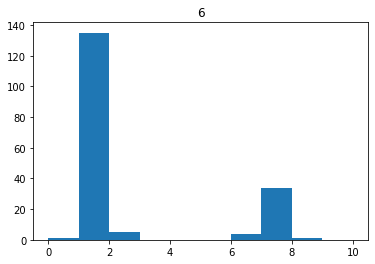

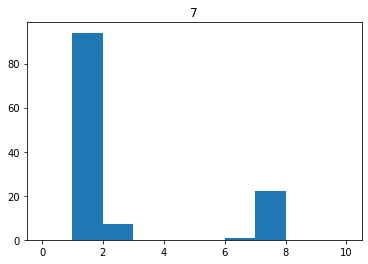

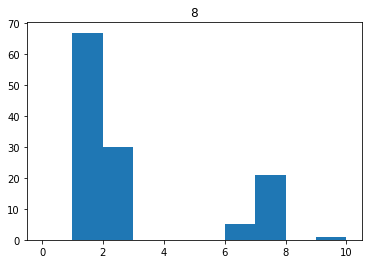

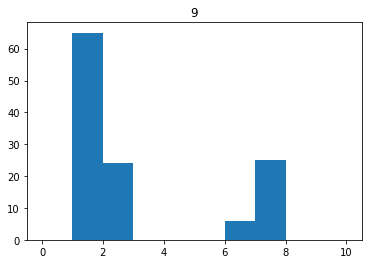

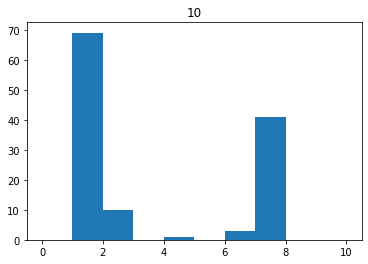

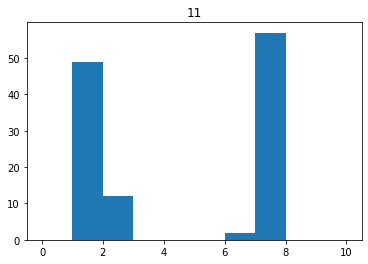

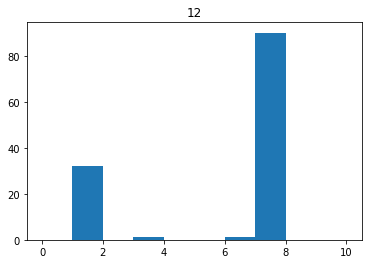

In [33]:
#各月ごとのクラス分布グラフ
for i in ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]:
    #sns.countplot("classnumber",data=out[out["month"]==i])
    plt.title(i)
    #plt.xticks(list(range(0,10)))
    plt.hist(out[out["month"]==int(i)]["classnumber"], range=(0, 10), bins=10)
    #plt.savefig("クラス分布（月ごと）："+str(i))
    plt.show()

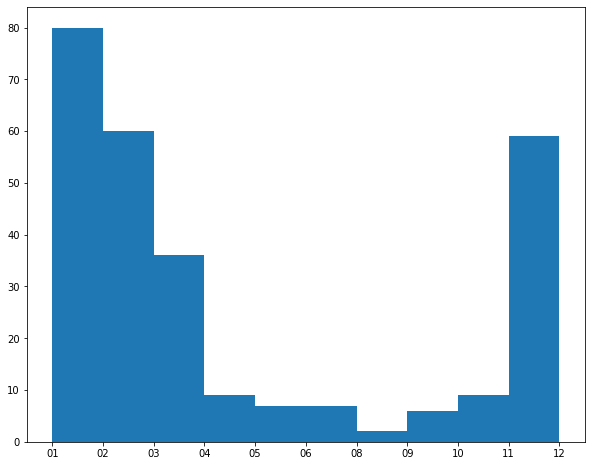

In [63]:
#隔月ごとの積み上げ棒グラフ
#書き方わかんねえよぉ！
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(out[out["classnumber"]==5]["month"])
plt.show()

In [58]:
out[out["classnumber"]=="01"]["classnumber"]

Series([], Name: classnumber, dtype: int32)

In [52]:
out[out["month"]==i]

,picture,classnumber,date,month
1,dataset\2019010100.jpg,5,2019010100,01
2,dataset\2019010112.jpg,5,2019010112,01
3,dataset\2019010200.jpg,7,2019010200,01
4,dataset\2019010212.jpg,8,2019010212,01
5,dataset\2019010300.jpg,8,2019010300,01
...,...,...,...,...
1520,dataset\2021012912.jpg,3,2021012912,01
1521,dataset\2021013000.jpg,8,2021013000,01
1522,dataset\2021013012.jpg,5,2021013012,01
1523,dataset\2021013100.jpg,5,2021013100,01


In [51]:
i

'01'